# Importing required libraries

In [22]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

import pandas as pd
import numpy as np


# Initializing Feature and Response matrices stored as .CSV files earlier

## Training Dataset

In [23]:
X_train = np.loadtxt(r'R:\Ryerson\Misc\Datasets\Preprocessed Data Files\90_Day_Window_Scaled\X_train_90_day_window_scaled.csv', delimiter=',')

y_target_train = np.loadtxt(r'R:\Ryerson\Misc\Datasets\Preprocessed Data Files\90_Day_Window_Scaled\y_target_train_90_day_window_scaled.csv', delimiter=',')


In [24]:
X_train.shape

y_target_train.shape


(211099, 18)

(211099,)

## Validation Dataset

In [25]:
X_valid = np.loadtxt(r'R:\Ryerson\Misc\Datasets\Preprocessed Data Files\90_Day_Window_Scaled\X_valid_90_day_window_scaled.csv', delimiter=',')

y_target_valid = np.loadtxt(r'R:\Ryerson\Misc\Datasets\Preprocessed Data Files\90_Day_Window_Scaled\y_target_valid_90_day_window_scaled.csv', delimiter=',')


In [26]:
X_valid.shape

y_target_valid.shape


(21839, 18)

(21839,)

## Testing Dataset

In [27]:
X_test = np.loadtxt(r'R:\Ryerson\Misc\Datasets\Preprocessed Data Files\90_Day_Window_Scaled\X_test_90_day_window_scaled.csv', delimiter=',')

y_target_test = np.loadtxt(r'R:\Ryerson\Misc\Datasets\Preprocessed Data Files\90_Day_Window_Scaled\y_target_test_90_day_window_scaled.csv', delimiter=',')


In [28]:
X_test.shape

y_target_test.shape


(21881, 18)

(21881,)

In [29]:
#y_target_train = y_target_train.ravel()
#y_target_train.shape

# Determining the optimal hyperparameter by training KNN with range of _k_ values

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

#plt.style.use('seaborn-poster')


## Importing required libraries and defining required metric variables

In [31]:
from sklearn import metrics
from tqdm.auto import tqdm

metricsMAE = []
metricsMSE = []
metricsRMSE = []
metricsR2 = []


## Training KNN model with range of _k_ values and storing the resulting metrics

In [32]:
def trainKNNAndPredict(kSizeList, X_train, X_test, y_train, y_test, knnModel=KNeighborsRegressor):
    
    # Training KNN for each k and storing scores
    for k in tqdm(kSizeList):
        # Initialize, fit, predict
        knn = knnModel(n_neighbors=k)
        
        knn.fit(X_train, y_train)
        
        yPredicted = knn.predict(X_test)
        
        #store metrics
        metricsMAE.append(metrics.mean_absolute_error(y_test, yPredicted))
        metricsMSE.append(metrics.mean_squared_error(y_test, yPredicted))
        metricsRMSE.append(np.sqrt(metrics.mean_squared_error(y_test, yPredicted)))
        metricsR2.append(metrics.r2_score(y_test, yPredicted))
        

## Plotting the R^2 scores obtained

In [33]:
def plotMetricsCurve(kSizeList):

    # Plotting
    fig, ax = plt.subplots()
    
    ax.plot(kSizeList, metricsR2, label='Validation R^2', color='red')

    ax.set(title='Plot of R^2 Scores for KNN with Different Values for $k$',
           xlabel='Number of Neighbors',
           ylabel='R^2 Score')
    
    ax.legend()


  0%|          | 0/15 [00:00<?, ?it/s]

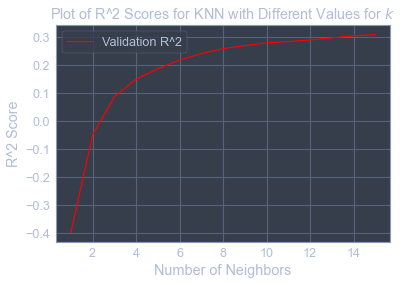

In [34]:
# Choosing values for k
numNeighbors = np.arange(1, 16)

# Calling training and plotting functions defined above
trainKNNAndPredict(numNeighbors, X_train, X_valid, y_target_train, y_target_valid)
plotMetricsCurve(numNeighbors)


# Examining the plot above, it can be inferred that _k = 15_ has the best R^2 score. Therefore, predicting drought scores for test data using a higher _k_ value:

In [35]:
#initialize, fit, and predict
knn = KNeighborsRegressor(n_neighbors=15, n_jobs=-1)
        
knn.fit(X_train, y_target_train)

yPredicted = knn.predict(X_test)

# print 
metricMAE = metrics.mean_absolute_error(y_target_test, yPredicted)
metricMSE = metrics.mean_squared_error(y_target_test, yPredicted)
metricRMSE = np.sqrt(metrics.mean_squared_error(y_target_test, yPredicted))
metricR2 = metrics.r2_score(y_target_test, yPredicted)

KNeighborsRegressor(n_jobs=-1, n_neighbors=15)

In [36]:
print('\nMAE: ', metricMAE, '\n\nMSE: ', metricMSE, '\n\nRMSE: ', metricRMSE, '\n\nR^2 Score: ', metricR2)


MAE:  0.4889586316895937 

MSE:  0.5669626542720209 

RMSE:  0.7529692253153649 

R^2 Score:  0.22109670949836735
